# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

import mu2

import helium4plus as he4

In [7]:
ELL = 0

rg_flow = np.loadtxt('datfiles/he4plus_LO_nonlocal_rg_flow.txt')

In [8]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
# X = he4.FACTOR * he4.BETA6 # K•Å^3

In [9]:
nR = rg_flow.shape[0]
a0s = np.zeros(nR)
r0s = np.zeros(nR)
b2s = np.zeros(nR)

for i in range(nR):
    R, g = rg_flow[i]
    s = he4.Helium4System(R, ELL)
    a0, r0 = s.a0_and_r0(g, 0, momenta, use_c=True)
    b2 = np.abs(s.bound_state_spectrum(g, 0)[0])
    
    a0s[i] = a0
    r0s[i] = r0
    b2s[i] = b2

    print(f'{a0:.4e}  {r0:.4e}  {b2:.4e}')

1.0000e+02  8.6430e+00  1.3322e-03
1.0000e+02  8.3969e+00  1.3281e-03
1.0000e+02  8.2035e+00  1.3249e-03
1.0000e+02  8.0559e+00  1.3225e-03
1.0000e+02  7.9468e+00  1.3207e-03
1.0000e+02  7.8695e+00  1.3195e-03
1.0000e+02  7.8177e+00  1.3187e-03
1.0000e+02  7.7855e+00  1.3181e-03
1.0000e+02  7.7673e+00  1.3178e-03
1.0000e+02  7.7584e+00  1.3177e-03
1.0000e+02  7.7547e+00  1.3176e-03
1.0000e+02  7.7528e+00  1.3176e-03
1.0000e+02  7.7502e+00  1.3176e-03
1.0000e+02  7.7449e+00  1.3175e-03
1.0000e+02  7.7360e+00  1.3173e-03
1.0000e+02  7.7229e+00  1.3171e-03
1.0000e+02  7.7057e+00  1.3168e-03
1.0000e+02  7.6848e+00  1.3165e-03
1.0000e+02  7.6609e+00  1.3161e-03
1.0000e+02  7.6351e+00  1.3157e-03
1.0000e+02  7.6083e+00  1.3153e-03
1.0000e+02  7.5814e+00  1.3149e-03
1.0000e+02  7.5553e+00  1.3144e-03
1.0000e+02  7.5308e+00  1.3141e-03
1.0000e+02  7.5085e+00  1.3137e-03
1.0000e+02  7.4887e+00  1.3134e-03
1.0000e+02  7.4717e+00  1.3131e-03
1.0000e+02  7.4576e+00  1.3129e-03
1.0000e+02  7.4463e+

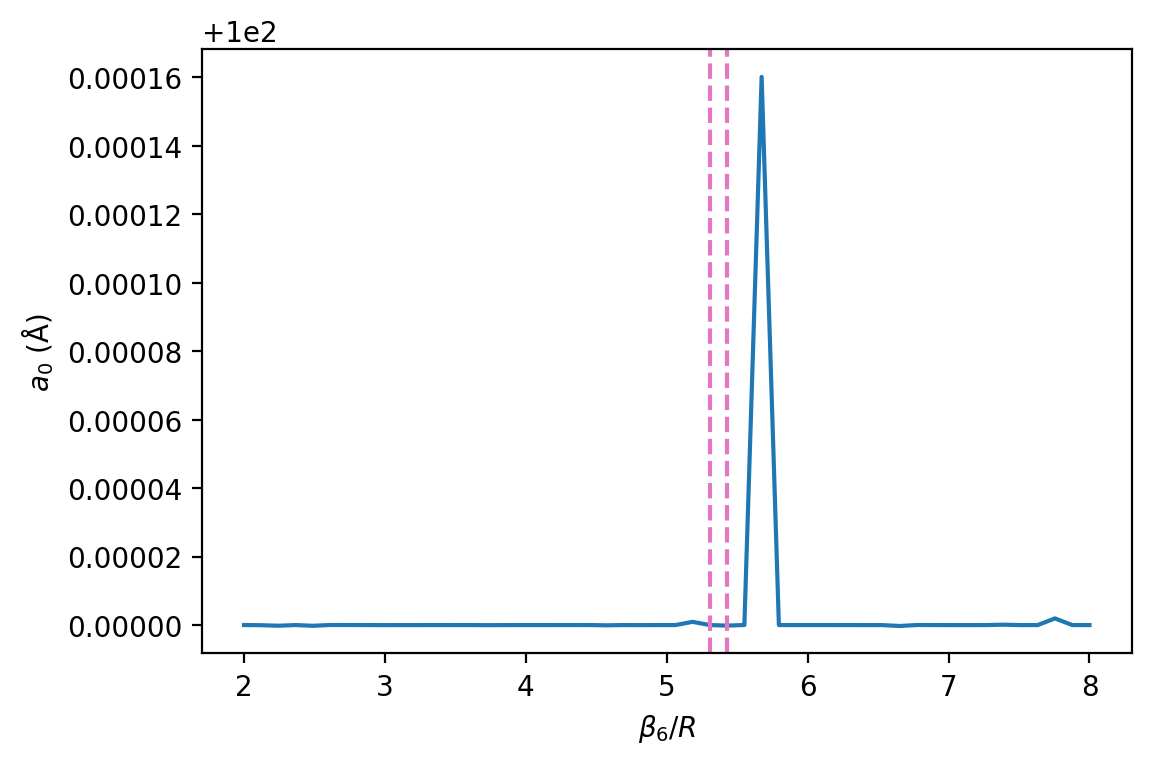

In [18]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, a0s)
ax.axvline(he4.BETA6/Rs[27], color='C6', linestyle='--')
ax.axvline(he4.BETA6/Rs[28], color='C6', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$a_0$ (Å)');

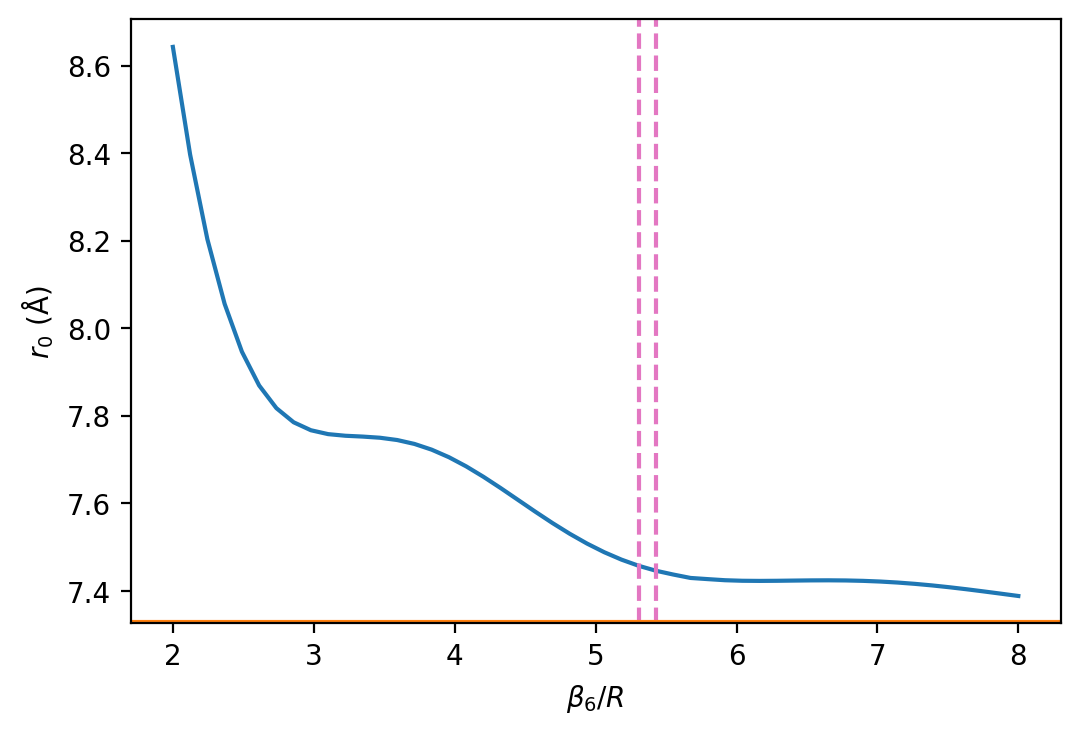

In [23]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, r0s)
ax.axvline(he4.BETA6/Rs[27], color='C6', linestyle='--')
ax.axvline(he4.BETA6/Rs[28], color='C6', linestyle='--')
ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

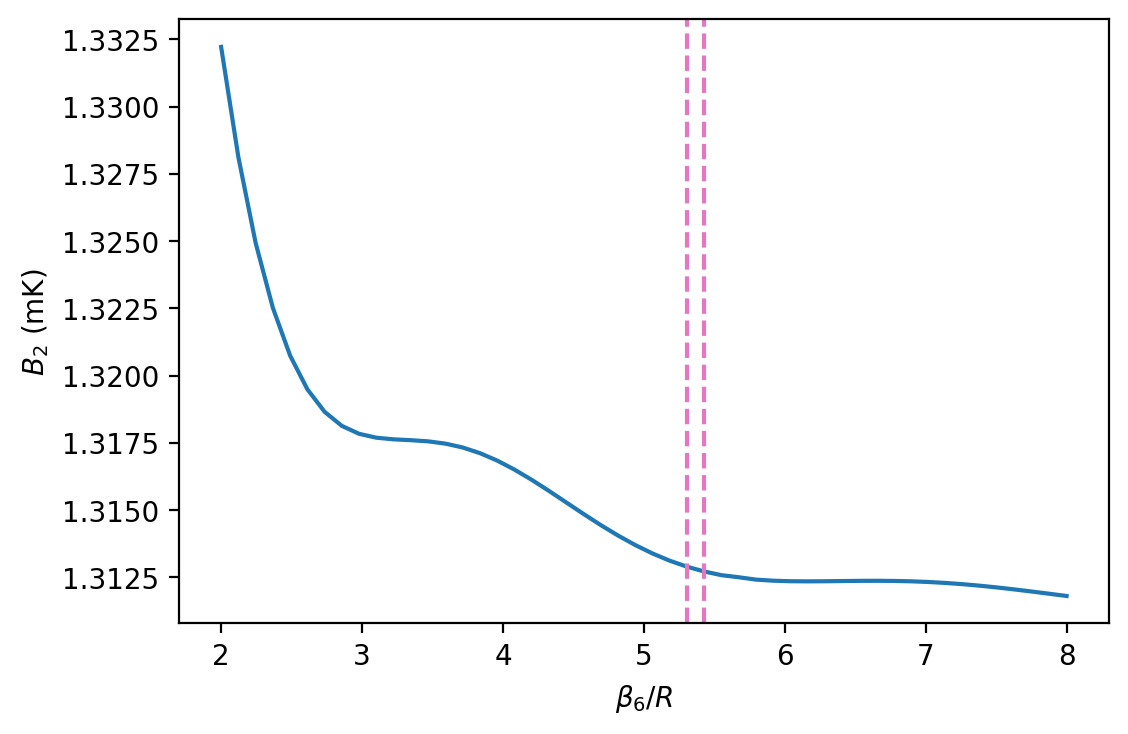

In [26]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, b2s*1000)
ax.axvline(he4.BETA6/Rs[27], color='C6', linestyle='--')
ax.axvline(he4.BETA6/Rs[28], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');

Hmm, I don't see anything suspicious. What about NLO?

In [27]:
ELL = 0

rg_flow = np.loadtxt('datfiles/rg-flow-plus.dat')

In [28]:
rg_flow.shape

(21, 3)

In [ ]:
Rs = rg_flow[:, 0]

In [29]:
nR = rg_flow.shape[0]
a0s = np.zeros(nR)
r0s = np.zeros(nR)
b2s = np.zeros(nR)

for i in range(nR):
    R, glo, gnlo = rg_flow[i]
    s = he4.Helium4System(R, ELL)
    a0, r0 = s.a0_and_r0(glo, gnlo, momenta, use_c=True)
    b2 = np.abs(s.bound_state_spectrum(glo, gnlo)[0])
    
    a0s[i] = a0
    r0s[i] = r0
    b2s[i] = b2

    print(f'{a0:.4e}  {r0:.4e}  {b2:.4e}')

9.9994e+01  7.3335e+00  1.3111e-03
9.9994e+01  7.3337e+00  1.3111e-03
9.9998e+01  7.3389e+00  1.3111e-03
9.9998e+01  7.3379e+00  1.3111e-03
9.9998e+01  7.3327e+00  1.3110e-03
9.9998e+01  7.3342e+00  1.3110e-03
9.9998e+01  7.3368e+00  1.3110e-03
9.9998e+01  7.3357e+00  1.3110e-03
9.9998e+01  7.3285e+00  1.3109e-03
9.9998e+01  7.3328e+00  1.3110e-03
9.9998e+01  7.3284e+00  1.3109e-03
9.9998e+01  7.3347e+00  1.3110e-03
9.9998e+01  7.3350e+00  1.3110e-03
9.9998e+01  7.3341e+00  1.3110e-03
9.9998e+01  7.3362e+00  1.3110e-03
9.9998e+01  7.3297e+00  1.3109e-03
9.9998e+01  7.3325e+00  1.3110e-03
9.9998e+01  7.3310e+00  1.3110e-03
9.9998e+01  7.3371e+00  1.3111e-03
1.1928e+01  5.1217e+00  1.7078e-01
9.9998e+01  7.3314e+00  1.3110e-03


In [34]:
for (i, R) in enumerate(rg_flow[:, 0]):
    print(i, R)

0 1.859734589041096
1 1.7863240131578948
2 1.718488924050633
3 1.6556173780487806
4 1.5971838235294118
5 1.5427343749999998
6 1.491875
7 1.4442619680851063
8 1.35760625
9 1.3180643203883498
10 1.280760613207547
11 1.2455103211009175
12 1.2121484375
13 1.1805271739130434
14 1.1505137711864406
15 1.1219886363636362
16 1.0948437500000001
17 1.0689812992125984
18 1.0443125
19 1.0207565789473683
20 0.9560607394366198


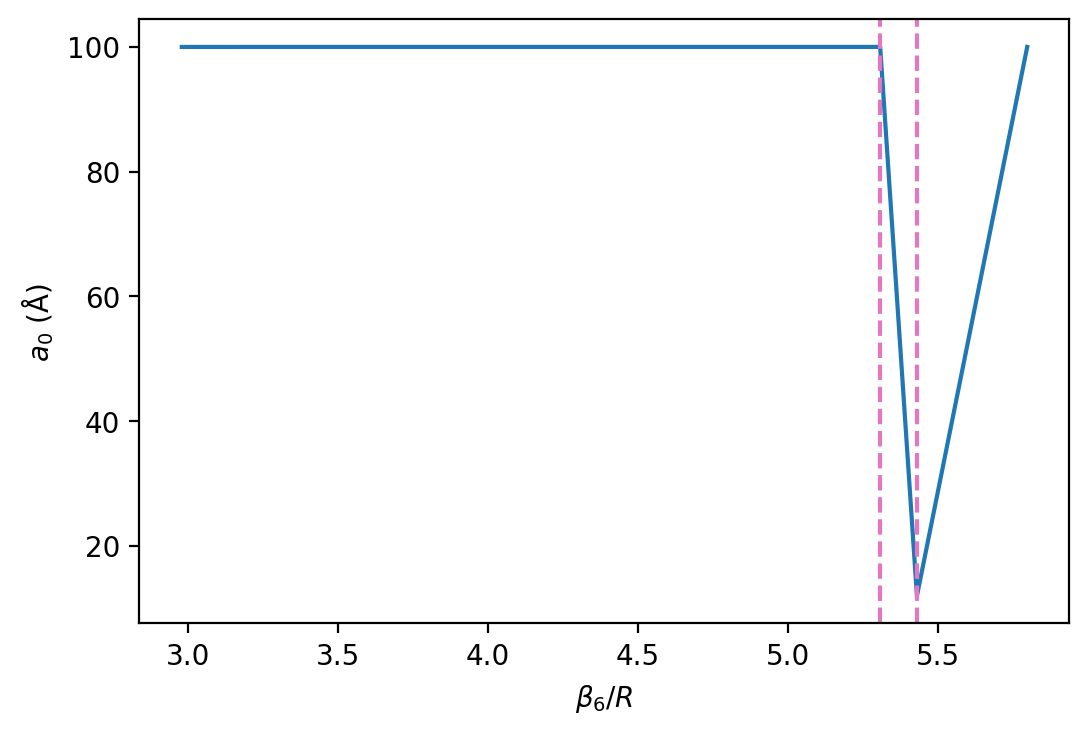

In [37]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/rg_flow[:, 0], a0s)
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$a_0$ (Å)');

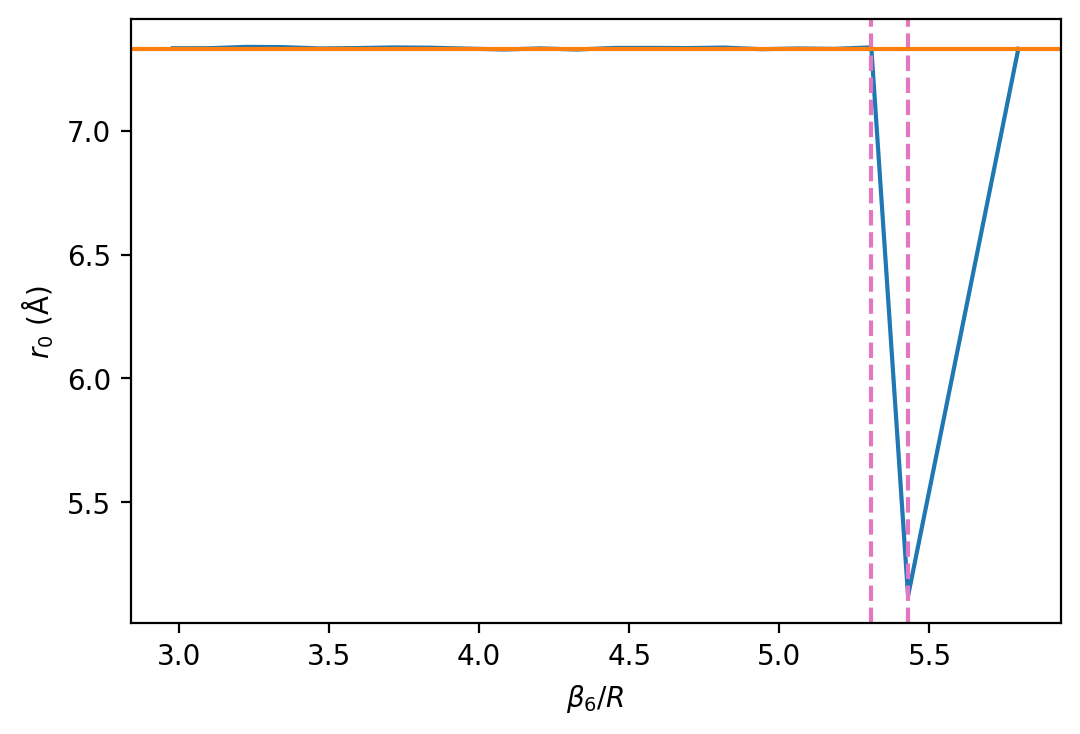

In [41]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/rg_flow[:, 0], r0s)
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

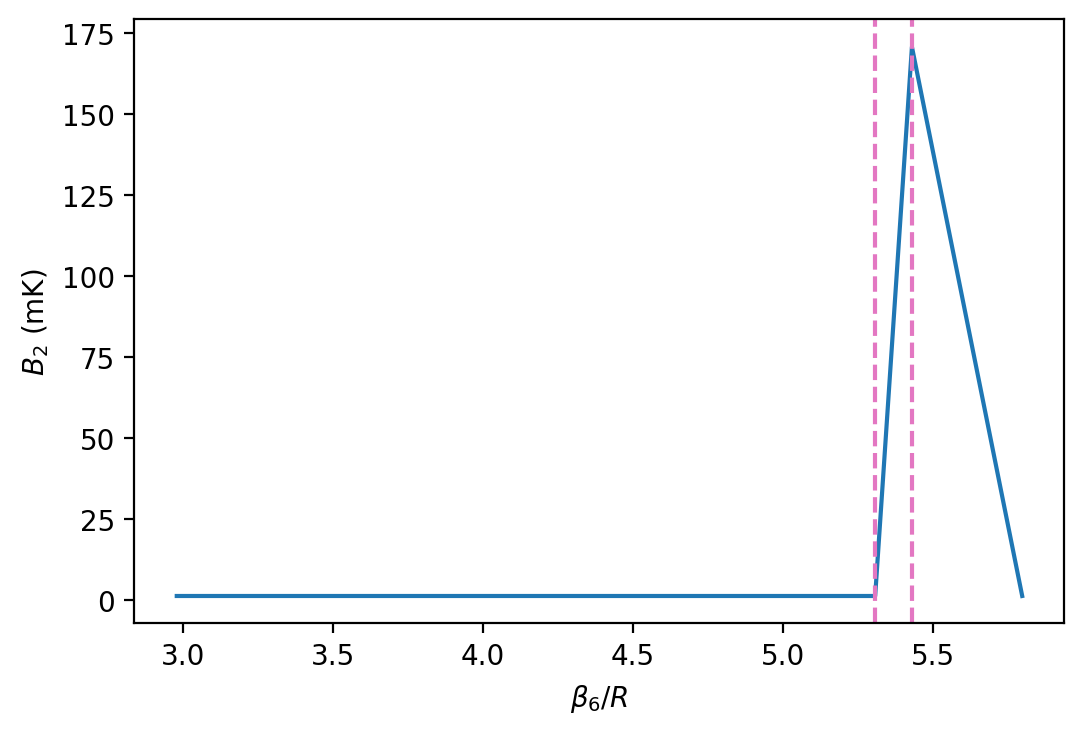

In [42]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/rg_flow[:, 0], b2s*1000)
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');